In [2]:
from sklearn.model_selection import train_test_split
import mglearn
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
model = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(model.decision_function(X_test).shape)

(75, 2)
(25, 2)
(25,)


In [6]:
print(model.decision_function(X_test))
### 양성 클래스인 클래스 1에 속한다고 믿는 정도.
print(y_test)

### 1 => 4.13, 0 => -1.70, 0 => -3.95 ..... 0 => -7.69만큼 믿음의 수치 [6]
### 가장 안전한 수치를 기록한 -7.69 즉, 음성 가능성 수치가 -7.69 = 의심 수치 가장 낮은 7번째 데이터
### 가장 위험한 수치를 기록한 4.28 즉, 양성 가능성 수치가 4.28 = 양성 의심 수치 가장 높은 5번째 데이터

[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]
[1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]


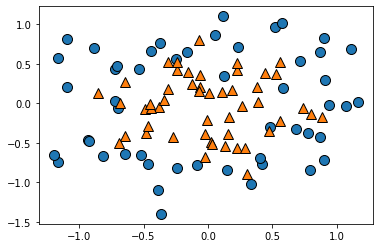

In [4]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [8]:
print(model.decision_function(X_test) > 0)
print(y_test)

[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
[1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1
 1]


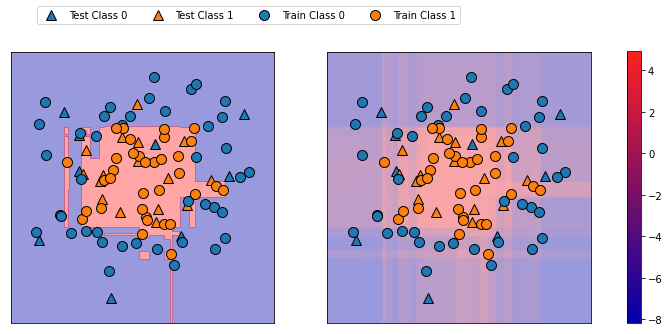

In [13]:
# Let's do visualization
fix, axes = plt.subplots(1, 2, figsize=(13, 5))

mglearn.tools.plot_2d_separator(model, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(model, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)

cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(['Test Class 0', 'Test Class 1', 'Train Class 0', 'Train Class 1'], ncol=4, loc=(.1, 1.1))

In [27]:
y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [26]:
model.predict_proba(X_test)  # [0.015, 0.985][0] => 0에 대한 확률 1.5%, 1에 대한 확률 98.5%
                             # 두 클래스에 대한 확률의 합은 항상 1이다.

array([[1.57362639e-02, 9.84263736e-01],
       [8.45756526e-01, 1.54243474e-01],
       [9.81128693e-01, 1.88713075e-02],
       [9.74070327e-01, 2.59296728e-02],
       [1.35214212e-02, 9.86478579e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.99543275e-01, 4.56725221e-04],
       [1.61426376e-02, 9.83857362e-01],
       [2.48329911e-01, 7.51670089e-01],
       [3.20518935e-02, 9.67948107e-01],
       [9.98441637e-01, 1.55836338e-03],
       [1.35214212e-02, 9.86478579e-01],
       [1.98099245e-02, 9.80190075e-01],
       [7.68580365e-01, 2.31419635e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.84817480e-01, 1.51825198e-02],
       [7.73836215e-01, 2.26163785e-01],
       [9.80463909e-01, 1.95360915e-02],
       [1.73607896e-02, 9.82639210e-01],
       [1.61426376e-02, 9.83857362e-01],
       [1.61426376e-02, 9.83857362e-01],
       [3.41393574e-01, 6.58606426e-01],
       [6.30759509e-02, 9.36924049e-01],
       [9.34424749e-01, 6.55752512e-02],
       [8.661995

In [29]:
# 보스턴 주택가격 데이터 Chapter 10 
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [33]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
### Load to DataFrame
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.to_csv('my_boston.csv')